# Support Vector Regression

Step-by Step

<h4>Importing Libraries</h4>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<h4>Importing Dataset</h4>

In [6]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1: -1].values
y = dataset.iloc[:, -1].values


y = y.reshape(len(y),1)

print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


<h4>Feature Scalling</h4>

In [7]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

x = sc_x.fit_transform(x)

y = sc_y.fit_transform(y)

print(x)


print(y)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


<h4>Training SVR model on whole dataset</h4>

In [8]:
from sklearn.svm import SVR

regressor = SVR(kernel='rbf')
regressor.fit(x,y)


/home/muhyasin89/.local/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

<h4>Predicting New Result</h4>

In [21]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[6.5]])))

array([170370.0204065])

<h4>Visualizing the SVR Result</h4>

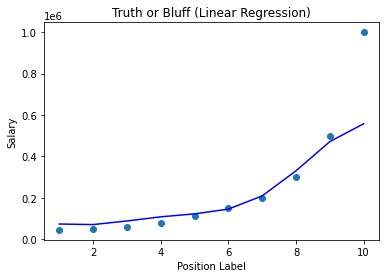

In [12]:
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y))
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform(regressor.predict(x)), color='blue')
plt.title("Truth or Bluff (Linear Regression)")
plt.xlabel("Position Label")
plt.ylabel("Salary")
plt.show()

<h4>Visualizing SVR result(for higher resolution and smoother curve)</h4>

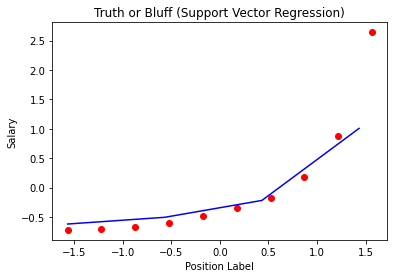

In [15]:
X_grid = np.arange(min(sc_x.inverse_transform(x)), max(sc_x.inverse_transform(x)), )
X_grid = X_grid.reshape(len(X_grid), 1)

plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color='red')
plt.plot(X_grid, regressor.predict(X_grid), color='blue')
plt.title("Truth or Bluff (Support Vector Regression)")
plt.xlabel("Position Label")
plt.ylabel("Salary")
plt.show()